In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np

In [10]:
filepath = 'C:/Users/SAYAN BHATTACHARYA/Documents/Projects/import technologies/The Scalable Guy/hobbist/hobby-project/data/raw/performance_tests_data.csv'

In [12]:
df_performance_data = pd.read_csv(filepath)
df_performance_data.head(10)

,Timestamp,Average Response Time (ms),90th Percentile Response Time (ms),Throughput (requests/sec),Latency (ms)
0,01-01-2023,649.342831,882.045806,267.960882,334.495009
1,02-01-2023,522.347140,693.839620,57.311821,177.066411
2,03-01-2023,679.537708,844.283939,256.454188,558.286791
3,04-01-2023,854.605971,1277.299297,82.217467,873.949928
4,05-01-2023,503.169325,675.409180,133.779714,499.089363
5,06-01-2023,503.172609,601.236279,235.877064,625.773616
6,07-01-2023,865.842563,987.677858,90.189974,512.274404
7,08-01-2023,703.486946,816.849404,254.491756,485.166552
8,09-01-2023,456.105123,546.588667,258.033545,637.861472
9,10-01-2023,658.512009,766.687455,176.866933,456.458818


In [14]:
df_performance_data.shape

(500, 5)

In [16]:
threshold = 700

#create binary classification target
df_performance_data["Performance Status"] = (df_performance_data["90th Percentile Response Time (ms)"] > threshold).astype(int)
df_performance_data.head(10)

,Timestamp,Average Response Time (ms),90th Percentile Response Time (ms),Throughput (requests/sec),Latency (ms),Performance Status
0,01-01-2023,649.342831,882.045806,267.960882,334.495009,1
1,02-01-2023,522.347140,693.839620,57.311821,177.066411,0
2,03-01-2023,679.537708,844.283939,256.454188,558.286791,1
3,04-01-2023,854.605971,1277.299297,82.217467,873.949928,1
4,05-01-2023,503.169325,675.409180,133.779714,499.089363,0
5,06-01-2023,503.172609,601.236279,235.877064,625.773616,0
6,07-01-2023,865.842563,987.677858,90.189974,512.274404,1
7,08-01-2023,703.486946,816.849404,254.491756,485.166552,1
8,09-01-2023,456.105123,546.588667,258.033545,637.861472,0
9,10-01-2023,658.512009,766.687455,176.866933,456.458818,1


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [20]:
X = df_performance_data.drop(["90th Percentile Response Time (ms)", "Timestamp"], axis=1)
y = df_performance_data["90th Percentile Response Time (ms)"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (350, 4), (350,)
Validation set: (75, 4), (75,)
Test set: (75, 4), (75,)


In [22]:
X_train.head(10)

,Average Response Time (ms),Throughput (requests/sec),Latency (ms),Performance Status
5,503.172609,235.877064,625.773616,0
116,543.057646,170.126737,649.407153,1
45,406.031158,130.902555,723.608920,0
16,347.433776,208.501426,580.476476,0
462,410.054898,166.301403,94.515156,0
357,492.268272,51.890719,564.246065,1
3,854.605971,82.217467,873.949928,1
218,452.927290,161.326314,604.458117,0
405,674.569987,118.701509,298.103048,1
60,454.165152,213.627804,294.968195,0


In [24]:
y_train.head(10)

5       601.236279
116     770.554348
45      468.464893
16      439.211441
462     596.834590
357     723.683256
3      1277.299297
218     627.933364
405     854.752158
60      522.162255
Name: 90th Percentile Response Time (ms), dtype: float64

In [26]:
X_test.head(10)

,Average Response Time (ms),Throughput (requests/sec),Latency (ms),Performance Status
290,508.375550,286.153555,389.811263,1
316,686.390594,131.758290,427.588472,1
117,316.264392,76.232545,386.480737,0
455,391.425433,131.083438,674.281745,0
268,461.991103,51.234995,637.037694,0
336,384.900561,200.862148,780.994666,0
79,152.486217,168.302477,360.009806,0
208,653.009537,228.956241,809.225536,1
238,417.642707,157.721881,782.687946,0
477,612.250031,108.660521,373.513011,0


In [28]:
X_train.isna().sum()

Average Response Time (ms)    0
Throughput (requests/sec)     0
Latency (ms)                  0
Performance Status            0
dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [37]:
#models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

#train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append((name, mae, rmse, r2))

df_results = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])
print(df_results)

                      Model         MAE        RMSE  R² Score
0         Linear Regression   49.736941   64.129264  0.934096
1             Decision Tree   63.828970   87.909137  0.876158
2             Random Forest   51.173973   70.116947  0.921215
3         Gradient Boosting   48.261024   69.225915  0.923204
4  Support Vector Regressor  167.877931  217.319776  0.243172


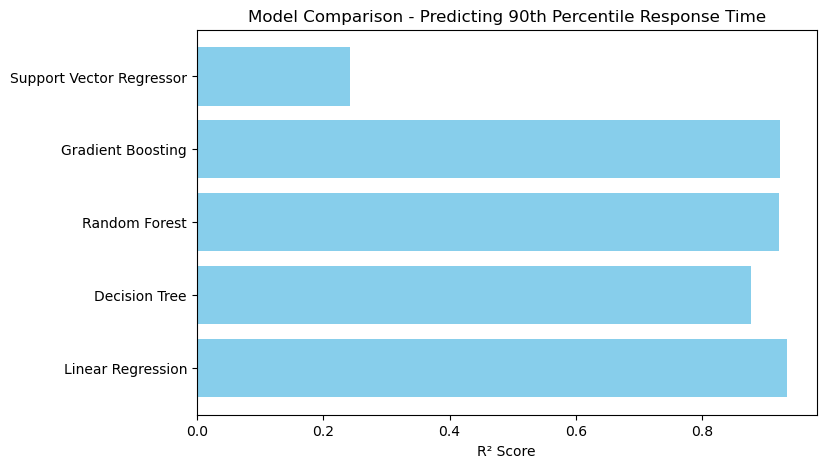

In [39]:
plt.figure(figsize=(8,5))
plt.barh(df_results["Model"], df_results["R² Score"], color='skyblue')
plt.xlabel("R² Score")
plt.title("Model Comparison - Predicting 90th Percentile Response Time")
plt.show()